# **Soil Wetness Prediction Using CNN**

In [ ]:
# Use GPU for the task(optional)
!pip install tensorflow-gpu

In [ ]:
# Show the GPU 
!nvidia-smi

Wed Mar 17 14:06:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
# Mounting to the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Show the tensorflow Version
import tensorflow as tf

tf.__version__

'2.4.1'

In [3]:
# Import important libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

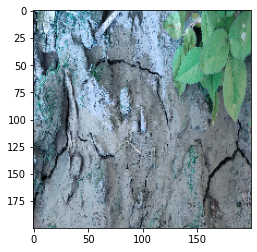

In [ ]:
# Show the sample image 
path="/content/drive/MyDrive/Datasets/testing/105.jpg"
img_array = cv2.imread(path,cv2.IMREAD_UNCHANGED)
img_array=cv2.resize(img_array,(200,200))
plt.imshow(img_array)

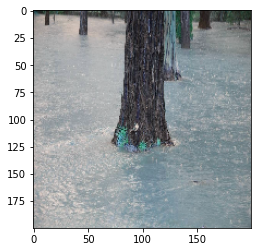

In [ ]:
path="/content/drive/MyDrive/Datasets/testing/117.jpg"
img_array = cv2.imread(path,cv2.IMREAD_UNCHANGED)
img_array=cv2.resize(img_array,(200,200))
plt.imshow(img_array)

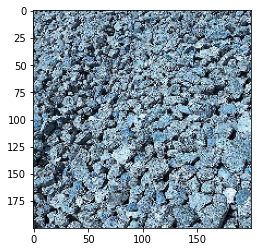

In [ ]:
path="/content/drive/MyDrive/Datasets/training/Dry/136.jpeg"
img_array = cv2.imread(path,cv2.IMREAD_UNCHANGED)
img_array=cv2.resize(img_array,(200,200))
plt.imshow(img_array)

In [4]:
#Show the shape op the image
cv2.imread("/content/drive/MyDrive/Datasets/testing/106.jpg").shape

(1844, 4000, 3)

**Data Preprocessing**

In [5]:
# we use Data Augmentation beacuse we have small dataset for trainning set only
train_set=ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2,     
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True
                             )
validation_set=ImageDataGenerator(rescale=1/255)

In [6]:
# Create trainning data set and Validation Dataset
train_dataset=train_set.flow_from_directory('/content/drive/MyDrive/Datasets/training',
                                           target_size=(200,200),batch_size=10
                                           )

validation_dataset=validation_set.flow_from_directory('/content/drive/MyDrive/Datasets/validation',
                                           target_size=(200,200),batch_size=10
                                           )

Found 444 images belonging to 3 classes.
Found 374 images belonging to 3 classes.


In [7]:
# Show the three different classes
train_dataset.class_indices

{'Dry': 0, 'Extreamly wet': 1, 'wet': 2}

**Model Creation**

In [8]:
# Create the CNN model of input,output and hidden layers20

model=tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                           tf.keras.layers.MaxPool2D(2,2),# 1st layer
                           
                           tf.keras.layers.Conv2D(40,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),# 2nd layer
                           
                           tf.keras.layers.Conv2D(70,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),# 3rd layer
                           
                           tf.keras.layers.Conv2D(90,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),# 4th layer
                           
                           
                           tf.keras.layers.Flatten(),# Flatten the layer
                           
                           tf.keras.layers.Dense(3, activation='softmax')
                           # Use softmax because we have more than three classes
    
]

)

In [9]:
# Compoile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
# fit the data into the model
model_fit=model.fit(train_dataset,
                   steps_per_epoch=10,
                   epochs=10,
                   validation_data=validation_dataset)

Epoch 1/10
10/10 [==============================] - 324s 35s/step - loss: 1.0758 - accuracy: 0.3964 - val_loss: 1.3602 - val_accuracy: 0.2674
Epoch 2/10
10/10 [==============================] - 109s 11s/step - loss: 1.1827 - accuracy: 0.2997 - val_loss: 1.0940 - val_accuracy: 0.6283
Epoch 3/10
10/10 [==============================] - 93s 10s/step - loss: 1.0972 - accuracy: 0.4483 - val_loss: 1.0555 - val_accuracy: 0.5775
Epoch 4/10
10/10 [==============================] - 85s 9s/step - loss: 1.0816 - accuracy: 0.3743 - val_loss: 1.0827 - val_accuracy: 0.1578
Epoch 5/10
10/10 [==============================] - 85s 9s/step - loss: 1.0456 - accuracy: 0.3350 - val_loss: 1.0314 - val_accuracy: 0.5775
Epoch 6/10
10/10 [==============================] - 79s 8s/step - loss: 1.0815 - accuracy: 0.3292 - val_loss: 1.0872 - val_accuracy: 0.5561
Epoch 7/10
10/10 [==============================] - 77s 8s/step - loss: 1.0968 - accuracy: 0.3312 - val_loss: 1.0765 - val_accuracy: 0.6043
Epoch 8/10
10/1

In [ ]:
# Import os for accessing the files
import os

**Show Some Predicted Images**

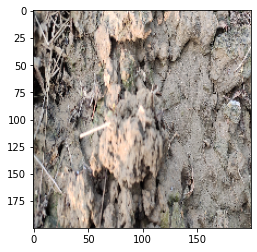

Extreamly Wet


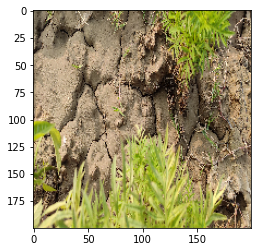

wet


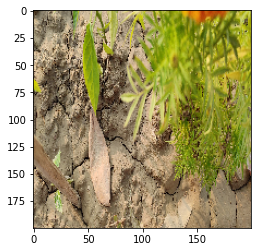

Dry


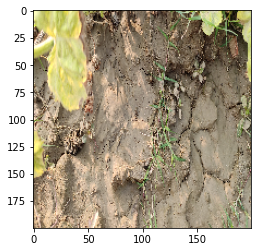

wet


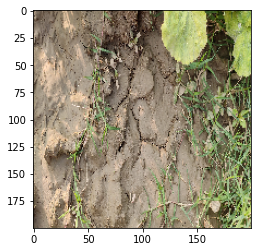

wet


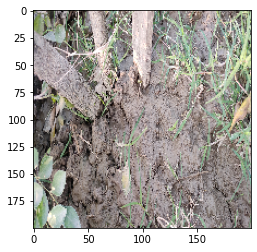

wet


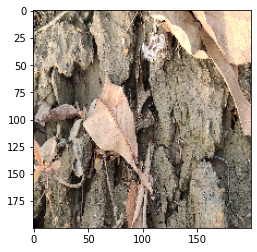

Extreamly Wet


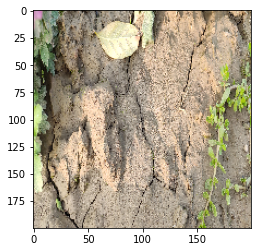

Extreamly Wet


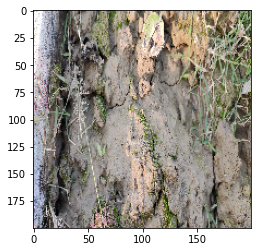

Extreamly Wet


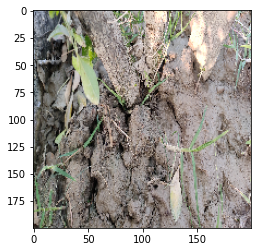

Extreamly Wet


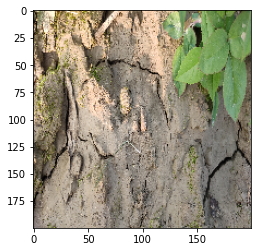

wet


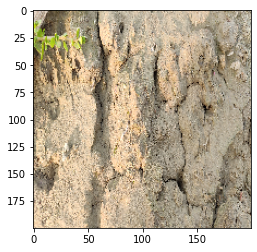

Extreamly Wet


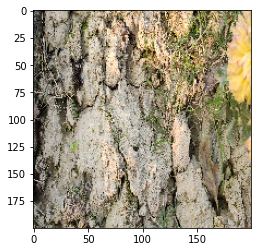

wet


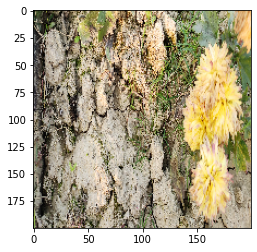

Dry


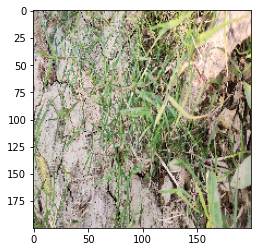

Extreamly Wet


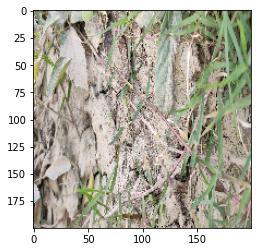

Extreamly Wet


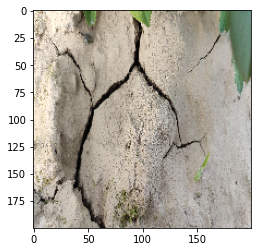

wet


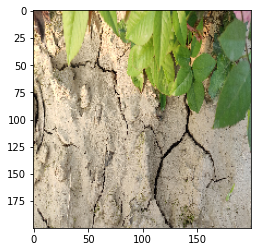

wet


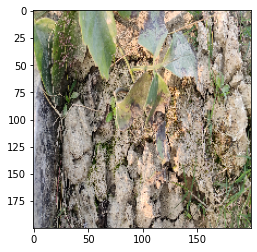

Extreamly Wet


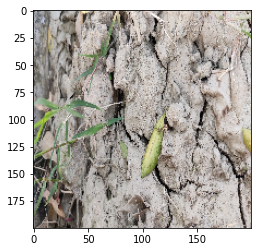

wet


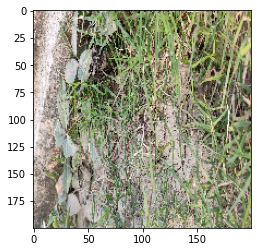

Extreamly Wet


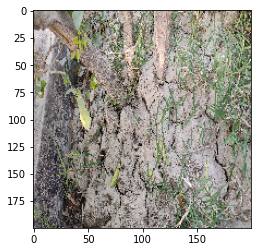

Extreamly Wet


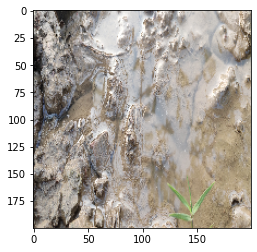

wet


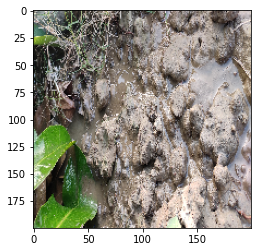

Extreamly Wet


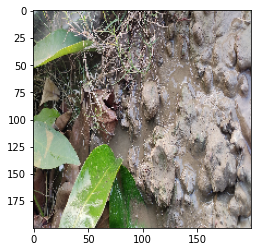

Extreamly Wet


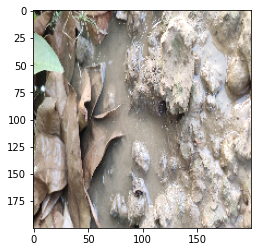

wet


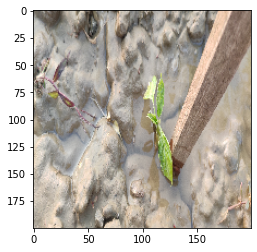

wet


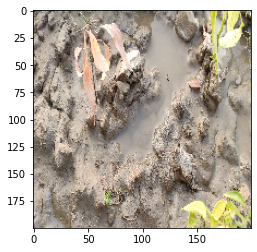

wet


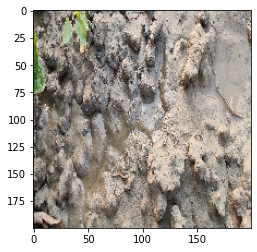

wet


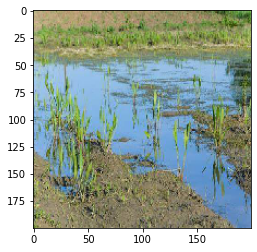

Dry


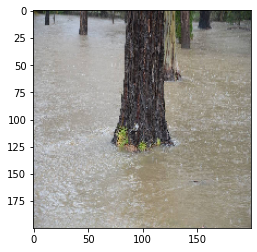

Dry


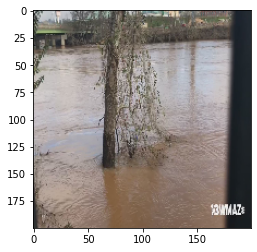

wet


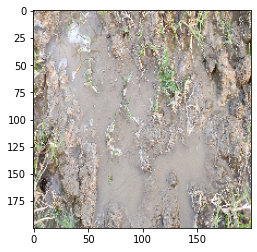

Dry


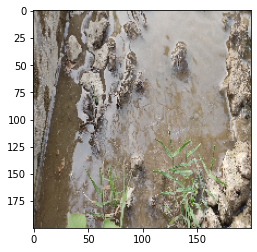

wet


In [ ]:
dir_path='/content/drive/MyDrive/Datasets/testing'

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'/'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    value=model.predict(images)
    if(value[0][0]==0):
        print("Dry")
    elif(value[0][0]==1):
        print("Extreamly Wet")
    else:
        print("wet")

**Convert the model into pickle file**

In [ ]:
import joblib
joblib.dump(model,'soil_wetness.pkl')